In [1]:
# to install all dependencies use, uncomment the following line and restart the kernel
# %pip install -U -r requirements.txt

# Generative model for the superposition of spiking motifs

We design a model based on heterosynaptic delays. We will define in the assembly of neurons where each synapse
is defined by a weight *ws* at different delays *τs*. 

### generative & inference models for polychronous groups

In [2]:
from brainhack import *
opt = Params()
opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=10.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

In [34]:
env = ABCD(opt)

In [35]:
env.opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=10.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

## spiking motifs


In [36]:
len(env.spike)//2, env.spike.shape

(17, torch.Size([35, 35, 3]))

In [37]:
env = ABCD(opt)
a, b, PG = env.generative_model()

In [38]:
a.min(), a.max()

(tensor(0.), tensor(1.))

In [39]:
env.temporal_mod.shape

torch.Size([144, 35, 71])

(<Figure size 1200x741.643 with 5 Axes>,
 array([<Axes: title={'center': 'motif #1'}, xlabel='Delay', ylabel='@ Neuron'>,
        <Axes: title={'center': 'motif #2'}, xlabel='Delay'>,
        <Axes: title={'center': 'motif #3'}, xlabel='Delay'>,
        <Axes: title={'center': 'motif #4'}, xlabel='Delay'>,
        <Axes: title={'center': 'motif #5'}, xlabel='Delay'>], dtype=object))

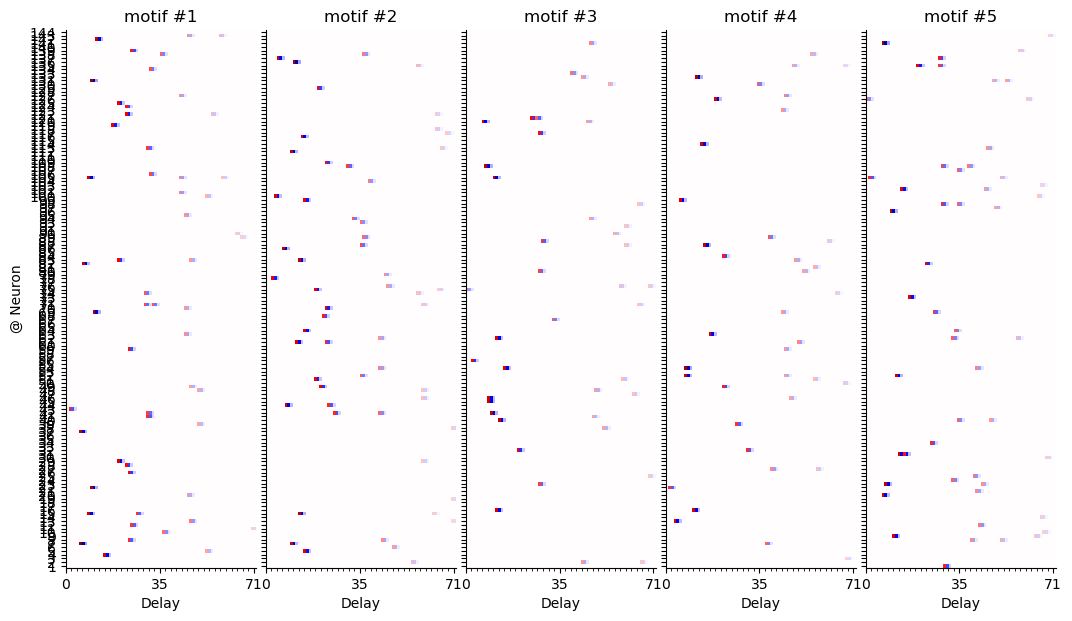

In [40]:
env.plot_PG(PG)

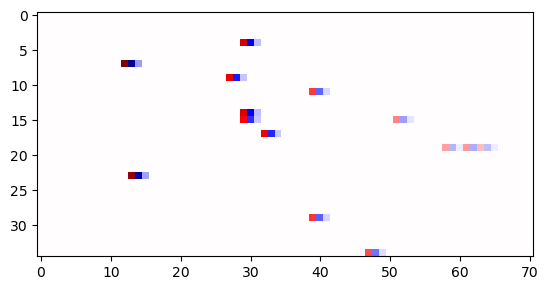

In [41]:
vmax = PG[0, :, :].abs().max()
plt.imshow(PG[0, :, :], cmap='seismic', vmin=-vmax, vmax=vmax)

# generative model with spiking motifs

In [35]:
N_PGs = 4
opt = Params(  datetag = datetag,
                    N_pre = 20, 
                    N_PGs = N_PGs,
                    N_PG_time = 71,
                    p_PG = .005,
                    E_PG=14.0,
                    p_A = 0.001,
                    p_B = 0.005,
                    N_PG_show = N_PGs,
                    N_trials = 1,
                    N_time = 1000,
                    seed = 2373,
                    fig_width = 4.5,
                    )
                    
env = ABCD(opt)
a, b, PG = env.generative_model()
# env.plot_PG(PG);
# TODO find a better rule to generate PGs
opt

Params(datetag='2022-11-28', N_pre=20, N_PG_time=71, N_PGs=4, E_PG=14.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1000, N_trials=1, p_B=0.005, p_A=0.001, seed=2373, verbose=False, fig_width=4.5, phi=1.61803, N_PG_show=4)

In [36]:
a.shape, b.shape, PG.shape

(torch.Size([1, 20, 1000]), torch.Size([1, 4, 1000]), torch.Size([20, 4, 71]))

Draw one instance of single PGs:

In [37]:
PG[0].shape

torch.Size([4, 71])

In [38]:
PG.shape

torch.Size([20, 4, 71])

Draw the occurrences of PGs:

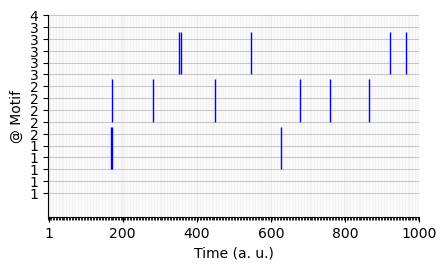

In [48]:
env.plot_b(b);

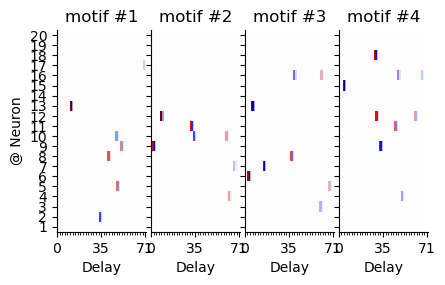

In [49]:
env.plot_PG(PG);

Resulting raster plot:

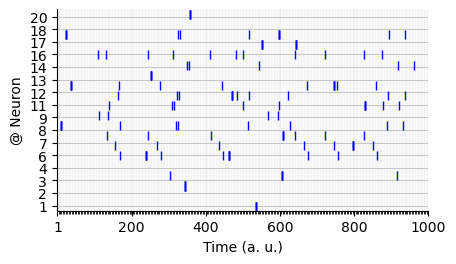

In [50]:
env.plot_a(a,b=b,PG=PG);

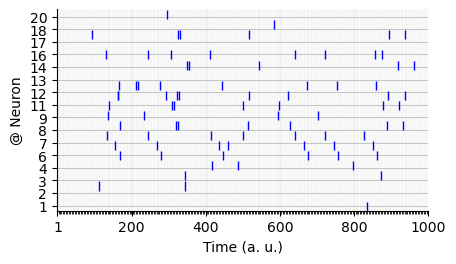

In [51]:
env.plot_a(a,PG=PG);

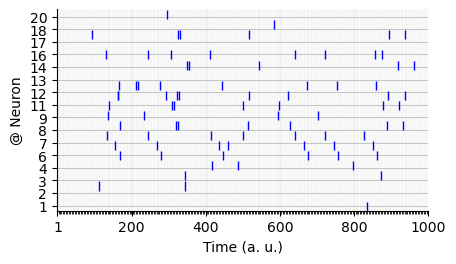

In [47]:
env.plot_a(a);

In [14]:
a.mean(), b.mean(), b.mean(axis=(0, -1))

(tensor(0.007),
 tensor(0.001),
 tensor([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.000, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]))

In [60]:
a.shape

torch.Size([10, 144, 1024])

Make a histogram of the ISI's of "a"